# **IMAGE CLASSIFICATION MODEL**

## **Importing necessary libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## **Load the Dataset**

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

## **Basic Commands Display**

In [3]:
x_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
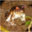

In [4]:
x_train[0]

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[ :5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_train[ :5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test=y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","frog","horse","ship","truck"]

In [10]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

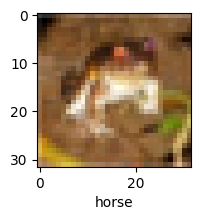

In [11]:
plot_sample(x_train, y_train,0)

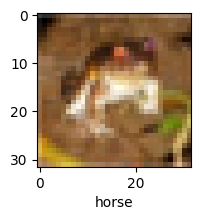

In [12]:
plot_sample(x_train, y_train, 0)

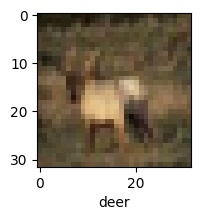

In [13]:
plot_sample(x_train, y_train, 3)

## **Normalizing the training data**

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# **Artificial Neural Network for Image Classification**

In [15]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.3036 - loss: 1.9329
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 74ms/step - accuracy: 0.4191 - loss: 1.6496
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 88ms/step - accuracy: 0.4493 - loss: 1.5617
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 73ms/step - accuracy: 0.4773 - loss: 1.4854
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.4970 - loss: 1.4373


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.40      0.49      1000
           1       0.69      0.55      0.61      1000
           2       0.32      0.40      0.35      1000
           3       0.37      0.24      0.29      1000
           4       0.37      0.49      0.42      1000
           5       0.33      0.50      0.40      1000
           6       0.48      0.62      0.54      1000
           7       0.65      0.44      0.52      1000
           8       0.61      0.61      0.61      1000
           9       0.62      0.51      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



#**CNN TO TRAIN IMAGES**

In [17]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [19]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3857 - loss: 1.6789
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.6120 - loss: 1.1081
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6716 - loss: 0.9399
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7080 - loss: 0.8411
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7365 - loss: 0.7546
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7628 - loss: 0.6875
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7823 - loss: 0.6331
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.8013 - loss: 0.5763
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.8156 - loss: 0.5356
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8272 - loss: 0.4946


## **EVALUATION OF THE MODEL**

In [20]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7032 - loss: 0.9187


[0.9412544965744019, 0.7008000016212463]

In [21]:
y_pred=cnn.predict(x_test)
y_pred[ :5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[1.93773699e-03, 6.48380301e-05, 6.65457104e-04, 8.87238979e-01,
        6.30950381e-05, 1.05619937e-01, 2.22942952e-04, 1.68258324e-03,
        2.37528491e-03, 1.29167616e-04],
       [7.60047842e-05, 2.04779813e-03, 2.32402999e-06, 4.93108026e-08,
        5.85915183e-09, 5.04447095e-10, 7.39142436e-08, 1.17032262e-09,
        9.97870088e-01, 3.74183924e-06],
       [5.15089035e-01, 8.28995481e-02, 4.23113164e-03, 2.38535157e-03,
        1.33045670e-03, 1.34579634e-04, 2.73497280e-04, 9.31594477e-05,
        3.80943060e-01, 1.26202200e-02],
       [8.52496445e-01, 2.91043689e-05, 1.26984954e-01, 7.44731515e-04,
        1.21597797e-02, 1.44693395e-05, 5.43515373e-04, 1.25336637e-05,
        7.01330742e-03, 1.04866137e-06],
       [1.19393162e-09, 1.18239659e-05, 9.87405772e-04, 4.63657361e-03,
        4.27826121e-02, 5.06124052e-04, 9.51069295e-01, 3.08165604e-09,
        6.04031220e-06, 5.47049872e-08]], dtype=float32)

In [22]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[ :5]

[3, 8, 0, 0, 6]

In [23]:
y_test[ :5]

array([3, 8, 8, 0, 6], dtype=uint8)

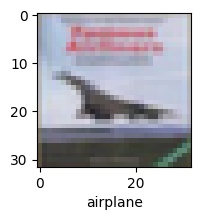

In [24]:
plot_sample(x_test, y_test,3)

In [25]:
classes[y_classes[3]]

'airplane'

In [26]:
classes[y_classes[6]]

'cat'